In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import sklearn.linear_model as lm
import sklearn.svm as svm
import sklearn.model_selection as mod_sel
import sklearn.metrics as met
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
from matplotlib import cm

def draw_scatter(pnt_2d, y, Title = None):
    C_map = cm.get_cmap('Spectral', 256)  # 'viridis'
    
    plt.figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')

    ## Under the original label
    plt.subplot(2,2,1)
    scatters = []      
    z = y
    y_label = list(set(z))
    nl = len(y_label)-1
    for k, lbl in enumerate(y_label):
        n = y_label[k]
        scatters.append(plt.scatter(pnt_2d[z==n, 0], pnt_2d[z==n, 1], \
                                    color=C_map(k/nl), # marker=markers[k], \
                                    label=lbl, s = 4))

    plt.legend( tuple(scatters),
                tuple(y_label),
                scatterpoints=1,
                loc='upper right',
                ncol=1, # len(scatters),                                                                                                 
                fontsize=10)
    plt.xlabel('UC 1')
    plt.ylabel('UC 2')
    if Title is not None: 
        plt.title(Title, fontsize=11)
    plt.grid()


In [3]:
# 데이터 로드
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
# 특징벡터와 목표값 설정
X = digits.data
y = digits.target
label = list(set(y))

print(X.shape)
print('Target names: ', label)

(1797, 64)
Target names:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


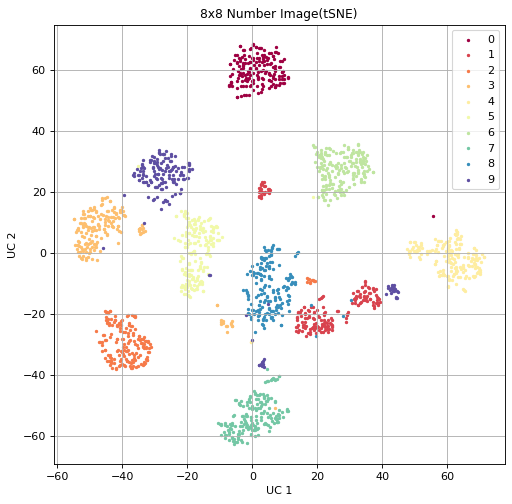

In [5]:
# 숫자 데이터를 tSNE를 통한 시각화
X_2d = TSNE(learning_rate=300, init="pca").fit_transform(X)

draw_scatter(X_2d, y, '8x8 Number Image(tSNE)')

In [6]:
# 분류기 생성
classifier = lm.LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 2000)

In [7]:
# 학습데이터와 테스트데이터를 각각 70% 30% 비율로 나눔
X_train, X_test, y_train, y_test = mod_sel.train_test_split(X, y, test_size=0.3, random_state=5)
# 분류기 학습
classifier.fit(X_train, y_train)

C:\Users\cdj97\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [8]:
print(classifier.coef_.shape)
print("theta_0 (coefficient): ",classifier.coef_)

(10, 64)
theta_0 (coefficient):  [[ 0.00000000e+00  1.87918541e-03 -4.98638232e-02 -5.44276408e-03
  -7.87956556e-04 -1.29210240e-01 -9.53480013e-02 -2.82557909e-02
   4.32721735e-06 -1.30586301e-02 -3.80065546e-02  1.12479453e-01
   8.89344233e-03  1.73686261e-02 -4.96703376e-02 -2.55703163e-02
   1.47663940e-06  1.79444868e-02  3.74685254e-02  1.93691694e-02
  -2.77905337e-01  1.65849848e-01  2.49692335e-02 -4.62893408e-03
   0.00000000e+00  6.70233545e-02  6.62163028e-02 -1.28269868e-01
  -3.49201012e-01  1.09433577e-02  6.00912606e-02 -1.74714883e-06
   0.00000000e+00  1.03974654e-01  9.23649589e-02 -1.09827395e-01
  -3.22823075e-01 -1.21839342e-02  5.78771687e-02  0.00000000e+00
   5.45431519e-06 -1.67833550e-02  2.31664821e-01 -1.06677179e-01
  -5.44618376e-02  7.35470017e-02  1.11971710e-02  1.58443070e-05
  -7.24122617e-07 -4.40397680e-02  1.03257216e-01 -1.94355184e-04
   6.33423817e-02  4.38876224e-03 -2.67960114e-02 -3.38864059e-03
   6.70310796e-07 -9.06453300e-03 -5.800485

In [9]:
print(classifier.intercept_.shape)
print("theta_0 (intercept): ",classifier.intercept_)

(10,)
theta_0 (intercept):  [ 4.91115259 -8.09399703 -1.98405433  0.39936389 12.49668909 -4.09203454
 -0.87193084  5.59152172 -2.34498375 -6.0117268 ]


In [10]:
# 성능 테스트
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# 테스트데이터의 성능 테스트
accuracy_test = 100*sum(y_test==y_pred)/len(y_test) # 테스트 데이터의 예측값과 실제값이 같은 갯수 / 테스트 데이터의 갯수 * 100 (%)

# 학습데이터의 성능 테스트
accuracy_train = 100*sum(y_train==y_pred_train)/len(y_train) # 학습 데이터의 예측값과 실제값이 같은 갯수 / 학습 데이터의 갯수 * 100(%)

print("테스트 데이터 정확도: %f(%%), 학습 데이터 정확도: %f(%%)"% (round(accuracy_test, 2), round(accuracy_train, 2)))

테스트 데이터 정확도: 96.300000(%), 학습 데이터 정확도: 100.000000(%)


In [11]:
# 클래스별 확률 확인
y_prob = classifier.predict_proba(X_test)
df_y_prob = pd.DataFrame(y_prob)
df_y_prob['y_pred'] = y_pred
df_y_prob

,0,1,2,3,4,5,6,7,8,9,y_pred
0,1.850985e-06,8.248110e-10,1.056159e-08,1.051182e-10,1.836920e-05,9.999770e-01,1.334388e-08,2.016519e-07,2.593086e-06,1.335201e-09,5
1,1.014168e-11,6.099349e-07,9.999994e-01,2.094042e-11,7.034728e-11,2.426815e-13,7.375789e-11,4.554017e-09,2.444679e-11,3.215648e-11,2
2,1.950834e-10,1.931736e-07,1.746324e-11,3.054006e-07,1.057923e-06,9.999984e-01,4.057548e-14,3.433087e-08,4.280709e-09,1.768540e-08,5
3,4.787560e-09,2.433271e-11,5.000793e-15,2.385285e-06,1.881927e-13,9.999973e-01,6.224882e-11,4.125837e-13,1.903776e-07,8.819226e-08,5
4,3.826796e-11,1.725341e-10,8.522343e-15,3.094076e-07,1.682490e-09,9.999996e-01,7.952452e-14,5.588873e-08,8.520014e-14,2.265148e-08,5
...,...,...,...,...,...,...,...,...,...,...,...
535,3.678265e-11,1.675912e-12,9.979903e-01,2.001296e-03,3.082924e-12,4.041932e-10,2.034208e-12,1.014388e-09,8.446471e-06,1.930926e-12,2
536,6.147139e-06,1.180779e-07,4.427799e-16,6.188768e-14,9.998947e-01,1.553428e-07,1.203501e-06,1.074172e-05,6.230297e-05,2.467202e-05,4
537,1.724144e-05,5.826851e-01,9.432165e-05,2.419317e-13,2.002603e-07,4.343371e-08,3.475289e-01,9.143995e-13,6.967420e-02,1.514393e-16,1
538,7.303864e-11,1.770153e-08,2.441329e-10,1.200844e-07,8.640413e-11,9.999993e-01,1.472537e-12,2.249783e-10,5.153796e-07,3.022802e-08,5


In [12]:
# 5개의 그룹으로 나누어 교차검증을 진행
# 5개의 그룹 중 4개의 그룹은 학습 데이터 1개의 데이터는 테스트 데이터로 지정.
NCV = 5

# 성능 테스트
accuracies = mod_sel.cross_val_score(classifier, X, y, scoring="accuracy", cv=NCV, verbose=2, n_jobs=4)
accuracy = 100*accuracies.mean()

print("교차검증 정확도: %5.3f(%%)" % accuracy)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


교차검증 정확도: 91.432(%)


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.6s finished


In [13]:
# 혼동 행렬을 이용하여 예측값과 실제값의 차이를 확인
y_pred = mod_sel.cross_val_predict(classifier, X, y, cv=NCV, verbose=2, n_jobs=4)

c_mat = met.confusion_matrix(y, y_pred)
print("혼동 행렬(Confusion Metrix): ")
print(c_mat)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


혼동 행렬(Confusion Metrix): 
[[173   0   1   0   1   1   2   0   0   0]
 [  0 161   1   1   1   0   5   0   7   6]
 [  0   7 170   0   0   0   0   0   0   0]
 [  0   0   2 159   0   4   0   2  12   4]
 [  0   2   0   0 169   0   5   1   0   4]
 [  0   2   1   2   1 165   1   1   1   8]
 [  1   2   0   0   1   3 172   0   2   0]
 [  3   0   0   1   2   0   0 163   1   9]
 [  0   9   2   1   2   5   0   0 151   4]
 [  0   3   0   2   0   2   0   5   8 160]]


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.7s finished


In [14]:
# 그리드 탐색을 이용한 하이퍼 파라미터 최적화

# 파라미터 그리드 설정
param_grid = {
    'penalty': ['l2'],
    'C': [10, 100, 1000],
    'multi_class': ['multinomial'],
    'solver': ['lbfgs'],
    'max_iter': [2000],
}

# 최적 파라미터 탐색
clf = mod_sel.GridSearchCV(classifier, param_grid, cv=NCV, scoring='accuracy', verbose=2, n_jobs=4)
clf.fit(X, y)

# 최적 파라미터
best_param = clf.best_params_
print("최고점: ", str(round(clf.best_score_*100, 2)))
print("최적 파라미터: ", best_param)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
최고점:  90.82
최적 파라미터:  {'C': 10, 'max_iter': 2000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\cdj97\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
